# Importing Libraries

In [1]:
import pandas as pd 
import re
import nltk
import csv
import time
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
from scipy import stats
from sklearn.linear_model import LinearRegression
from sklearn.feature_extraction.text import TfidfTransformer
import warnings
warnings.filterwarnings("ignore")

%config InlineBackend.figure_format = 'retina'

# Data Cleansing

In [2]:
#Loading the Data
train = pd.read_csv("product_train.csv")
test = pd.read_csv("product_test.csv")

In [3]:
#Checking the Missing values
train.isna().sum()

ID                            0
Product_ID                    0
Age                           0
Review_Title               2638
Review_Text                 602
Rating                        0
Recommended                   0
Positive_Feedback_Count       0
Division                      9
Department                    9
Type                          9
dtype: int64

In [4]:
test.isna().sum()

ID                           0
Product_ID                   0
Age                          0
Review_Title               929
Review_Text                  0
Rating                       0
Positive_Feedback_Count      0
Division                     5
Department                   5
Type                         5
dtype: int64

In [5]:
#Filling the missing values with Not Specified
train['Division'].fillna('Not Specified', inplace=True)
train['Department'].fillna('Not Specified', inplace=True)
train['Type'].fillna('Not Specified', inplace=True)

In [6]:
#Filling the missing values with Not Specified
test['Division'].fillna('Not Specified', inplace=True)
test['Department'].fillna('Not Specified', inplace=True)
test['Type'].fillna('Not Specified', inplace=True)

In [7]:
#Filling the missing title and text
train['Review_Title'].fillna('No Title', inplace=True)
train['Review_Text'].fillna('No Text', inplace=True)

In [8]:
#Filling the missing title and text
test['Review_Title'].fillna('No Title', inplace=True)

In [9]:
train.isna().sum()

ID                         0
Product_ID                 0
Age                        0
Review_Title               0
Review_Text                0
Rating                     0
Recommended                0
Positive_Feedback_Count    0
Division                   0
Department                 0
Type                       0
dtype: int64

In [10]:
test.isna().sum()

ID                         0
Product_ID                 0
Age                        0
Review_Title               0
Review_Text                0
Rating                     0
Positive_Feedback_Count    0
Division                   0
Department                 0
Type                       0
dtype: int64

# Exploratory Data Analysis

In [11]:
#Mean of Age
train["Age"].mean()

43.19574209245742

In [12]:
#Mean of Ratings
train["Rating"].mean()

4.203710462287105

In [13]:
#Distribution of Recommended and Age

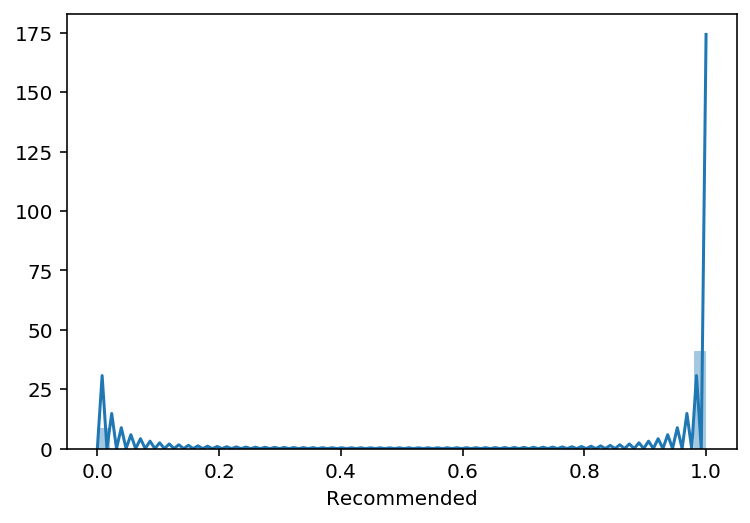

In [14]:
sns.distplot(train['Recommended'])
plt.savefig('Distribution of Recommended')

In [15]:
stats.skew(train['Recommended'])

-1.701832880395835

In [16]:
stats.kurtosis(train['Recommended'])

0.8962351527963843

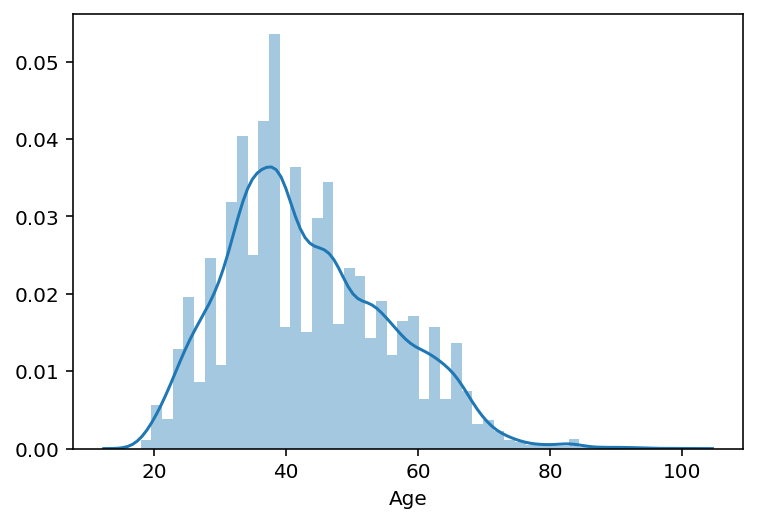

In [17]:
sns.distplot(train['Age'])
plt.savefig('Distribution of Age')

In [18]:
stats.skew(train['Age'])

0.5317929215338373

In [19]:
stats.kurtosis(train['Age'])

-0.08159534238891197

Text(0.5, 1.0, 'Rating vs Age')

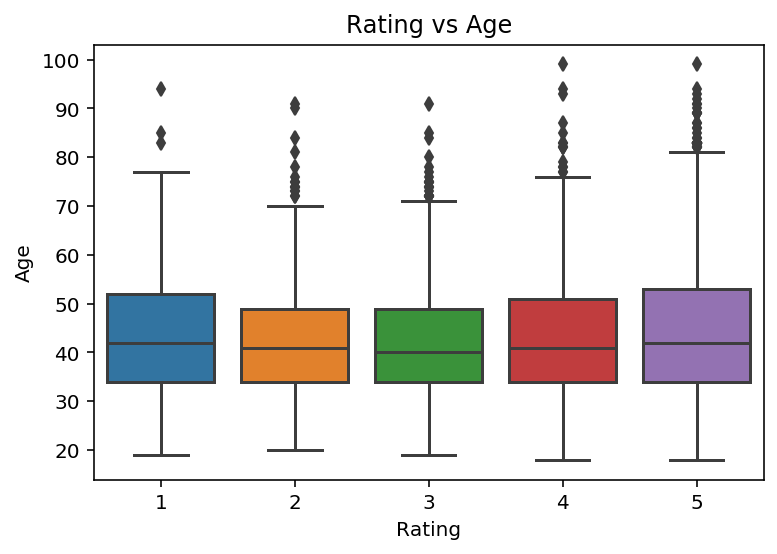

In [20]:
#Boxplot between Rating and Age
sns.boxplot(x="Rating", y="Age", data=train).set_title('Rating vs Age')

Text(0.5, 1.0, 'Age vs Rating')

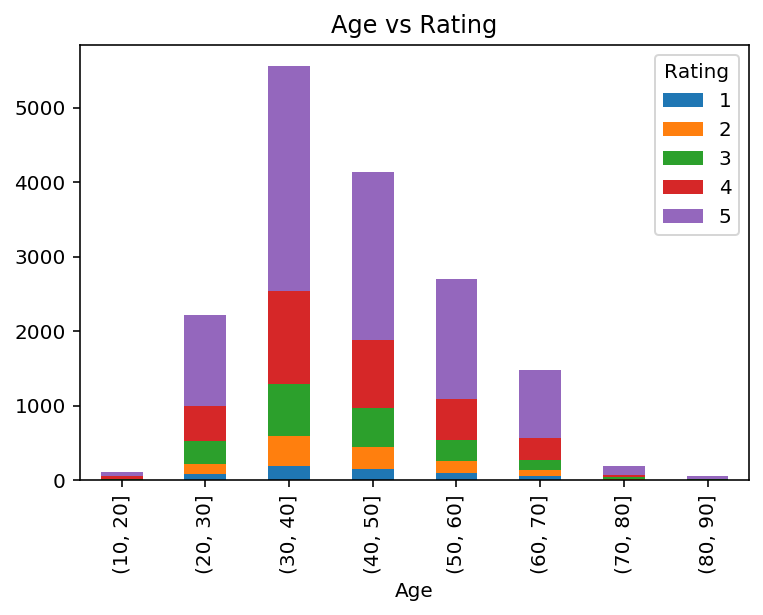

In [21]:
# Bar Plot Analysis of Several Variables
train.groupby(['Rating', pd.cut(train['Age'], np.arange(0,100,10))])\
       .size()\
       .unstack(0)\
       .plot.bar(stacked=True).set_title('Age vs Rating')

Text(0.5, 1.0, 'Age vs Recommended')

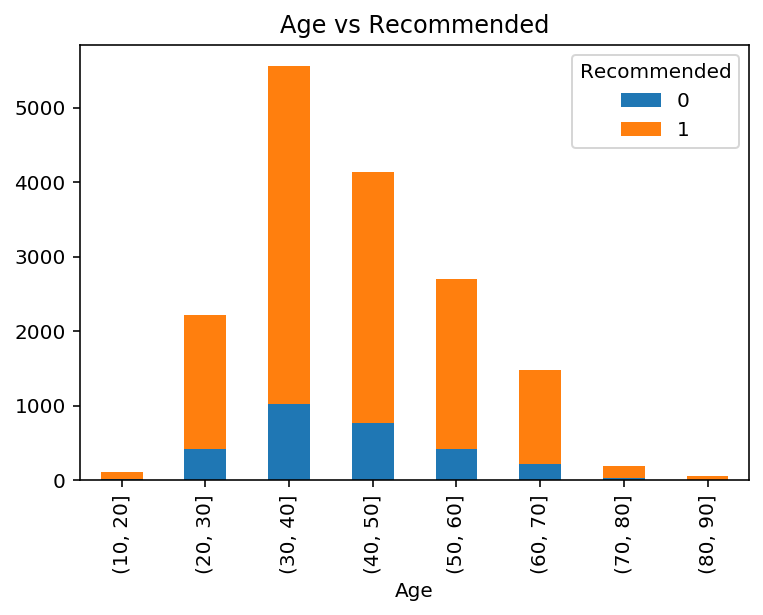

In [22]:
train.groupby(['Recommended', pd.cut(train['Age'], np.arange(0,100,10))])\
       .size()\
       .unstack(0)\
       .plot.bar(stacked=True).set_title('Age vs Recommended')

Text(0.5, 1.0, 'Age vs Division')

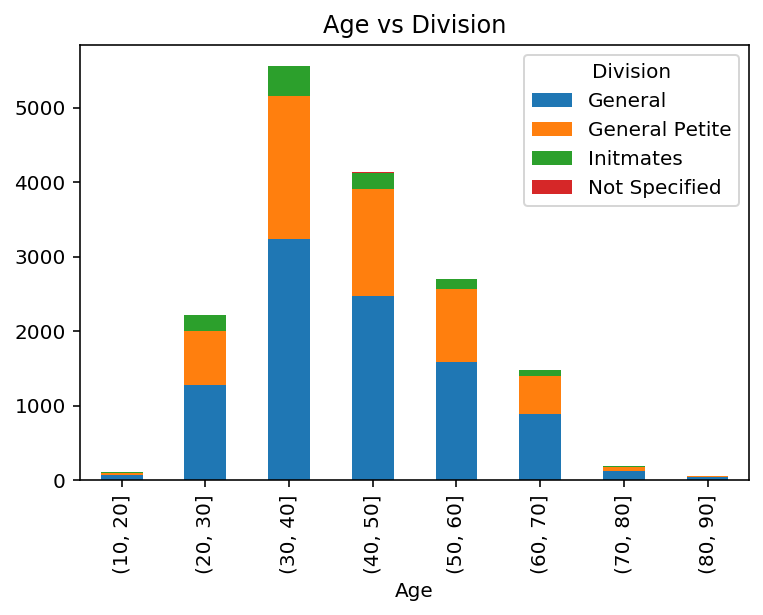

In [23]:
train.groupby(['Division', pd.cut(train['Age'], np.arange(0,100,10))])\
       .size()\
       .unstack(0)\
       .plot.bar(stacked=True).set_title('Age vs Division')

Text(0.5, 1.0, 'Department vs Age')

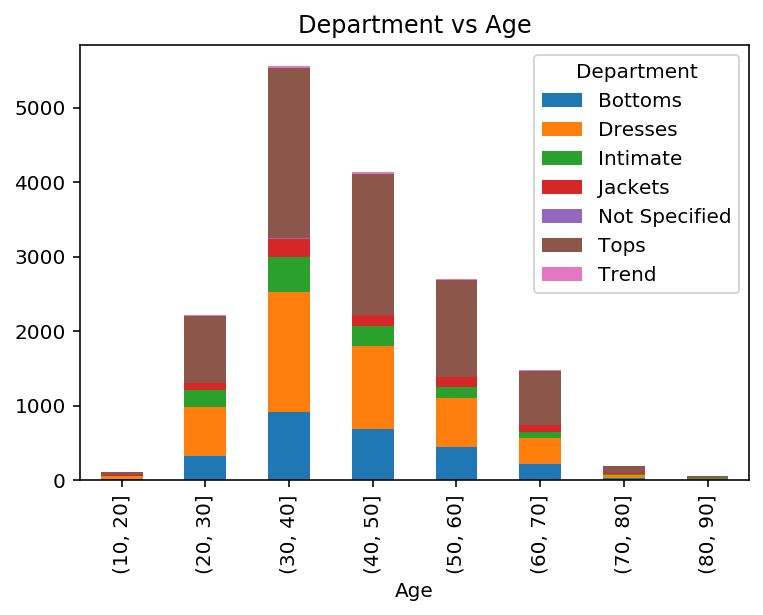

In [24]:
train.groupby(['Department', pd.cut(train['Age'], np.arange(0,100,10))])\
       .size()\
       .unstack(0)\
       .plot.bar(stacked=True).set_title('Department vs Age')

Text(0.5, 1.0, 'Rating vs Recommended')

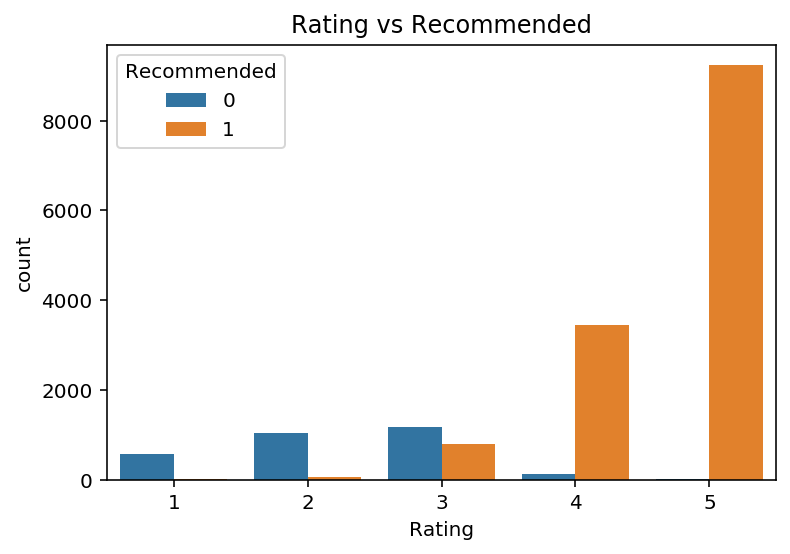

In [25]:
sns.countplot('Rating',hue='Recommended',data=train).set_title('Rating vs Recommended')

Text(0.5, 1.0, 'Rating vs Department')

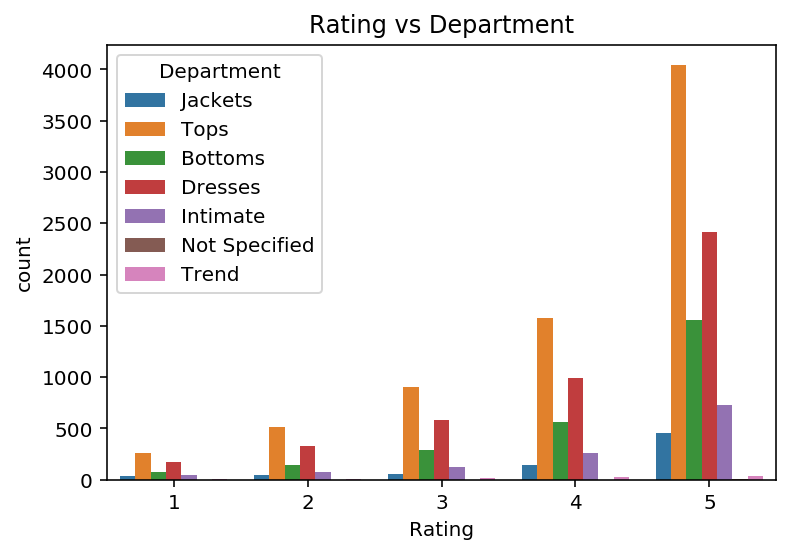

In [26]:
sns.countplot('Rating',hue='Department',data=train).set_title('Rating vs Department')

Text(0.5, 1.0, 'Rating vs Type')

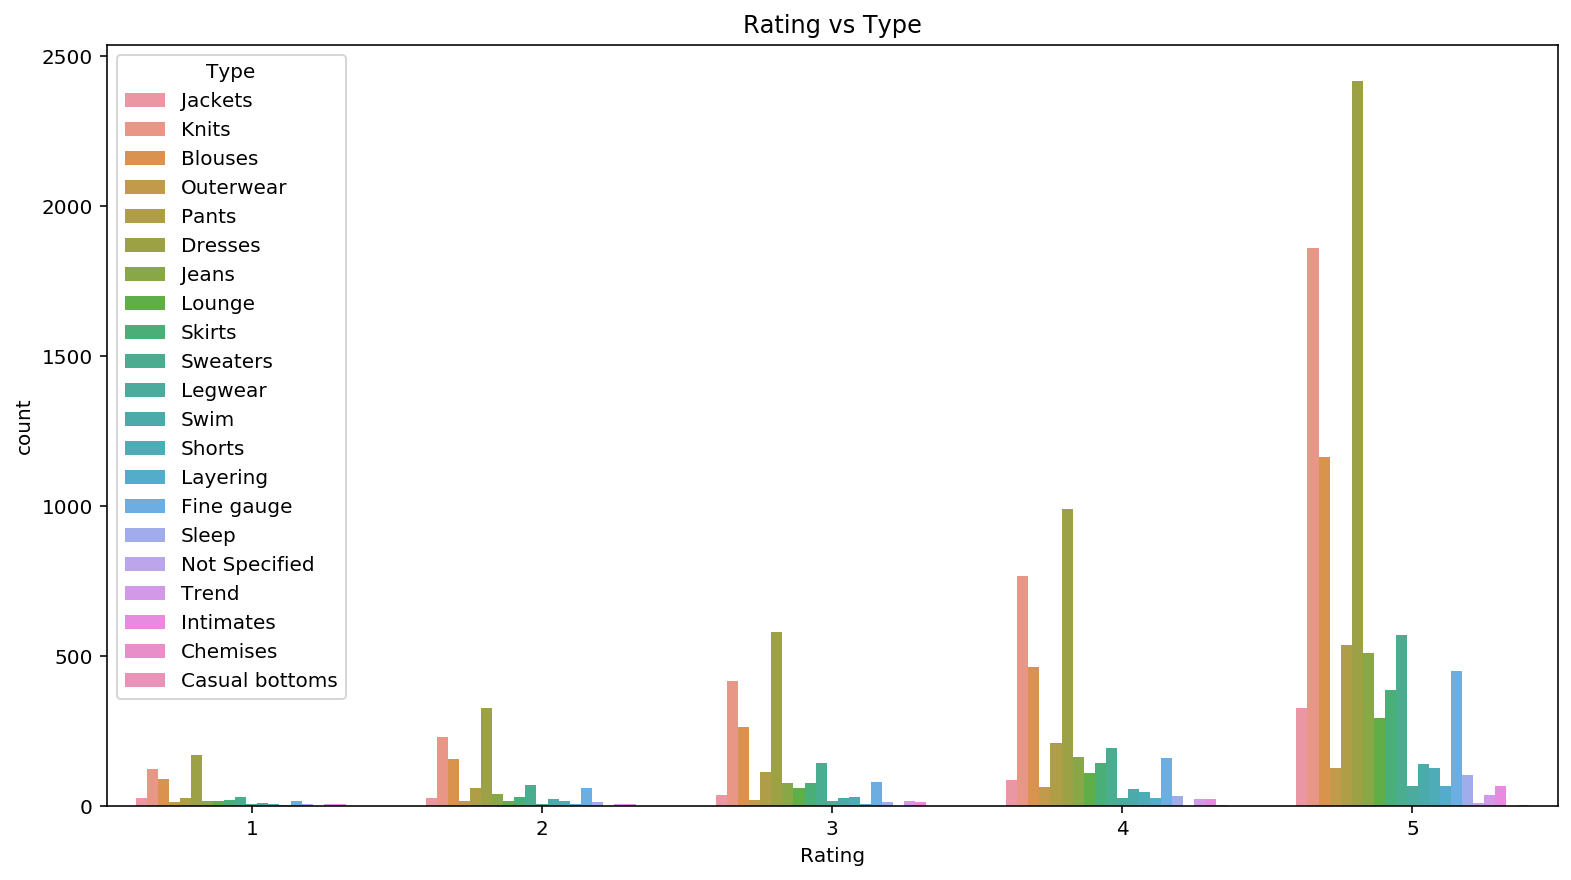

In [27]:
plt.figure(figsize=(13,7))
sns.countplot('Rating',hue='Type',data=train).set_title('Rating vs Type')

Text(0.5, 1.0, 'Rating vs Division')

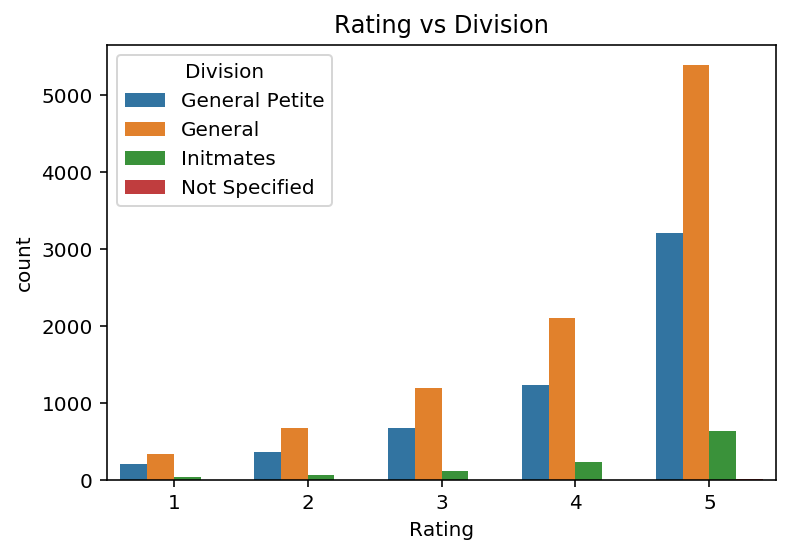

In [28]:
sns.countplot('Rating',hue='Division',data=train).set_title('Rating vs Division')

Text(0.5, 1.0, 'Recommended vs Division')

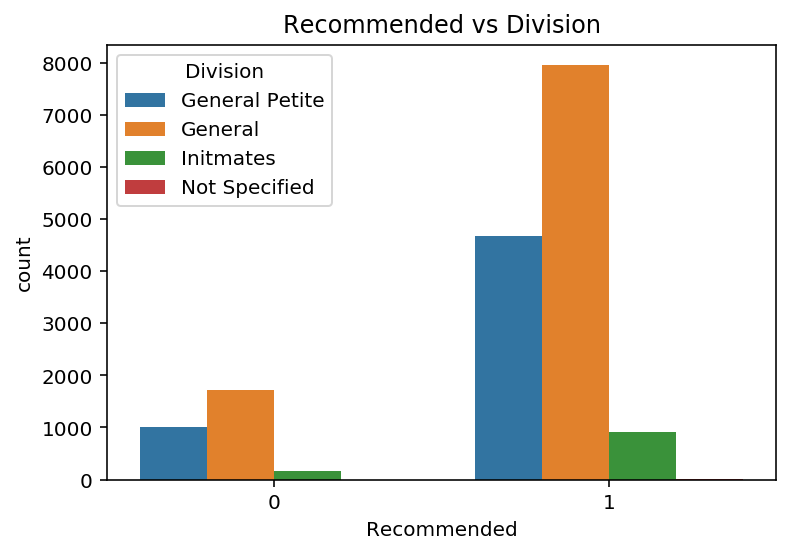

In [29]:
sns.countplot('Recommended',hue='Division',data=train).set_title('Recommended vs Division')

Text(0.5, 1.0, 'Recommended vs Department')

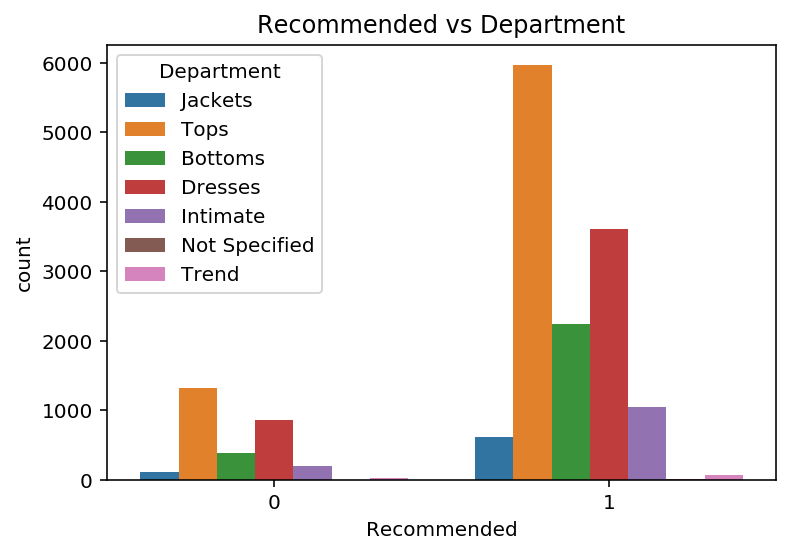

In [30]:
sns.countplot('Recommended',hue='Department',data=train).set_title('Recommended vs Department')

Text(0.5, 1.0, 'Recommended vs Type')

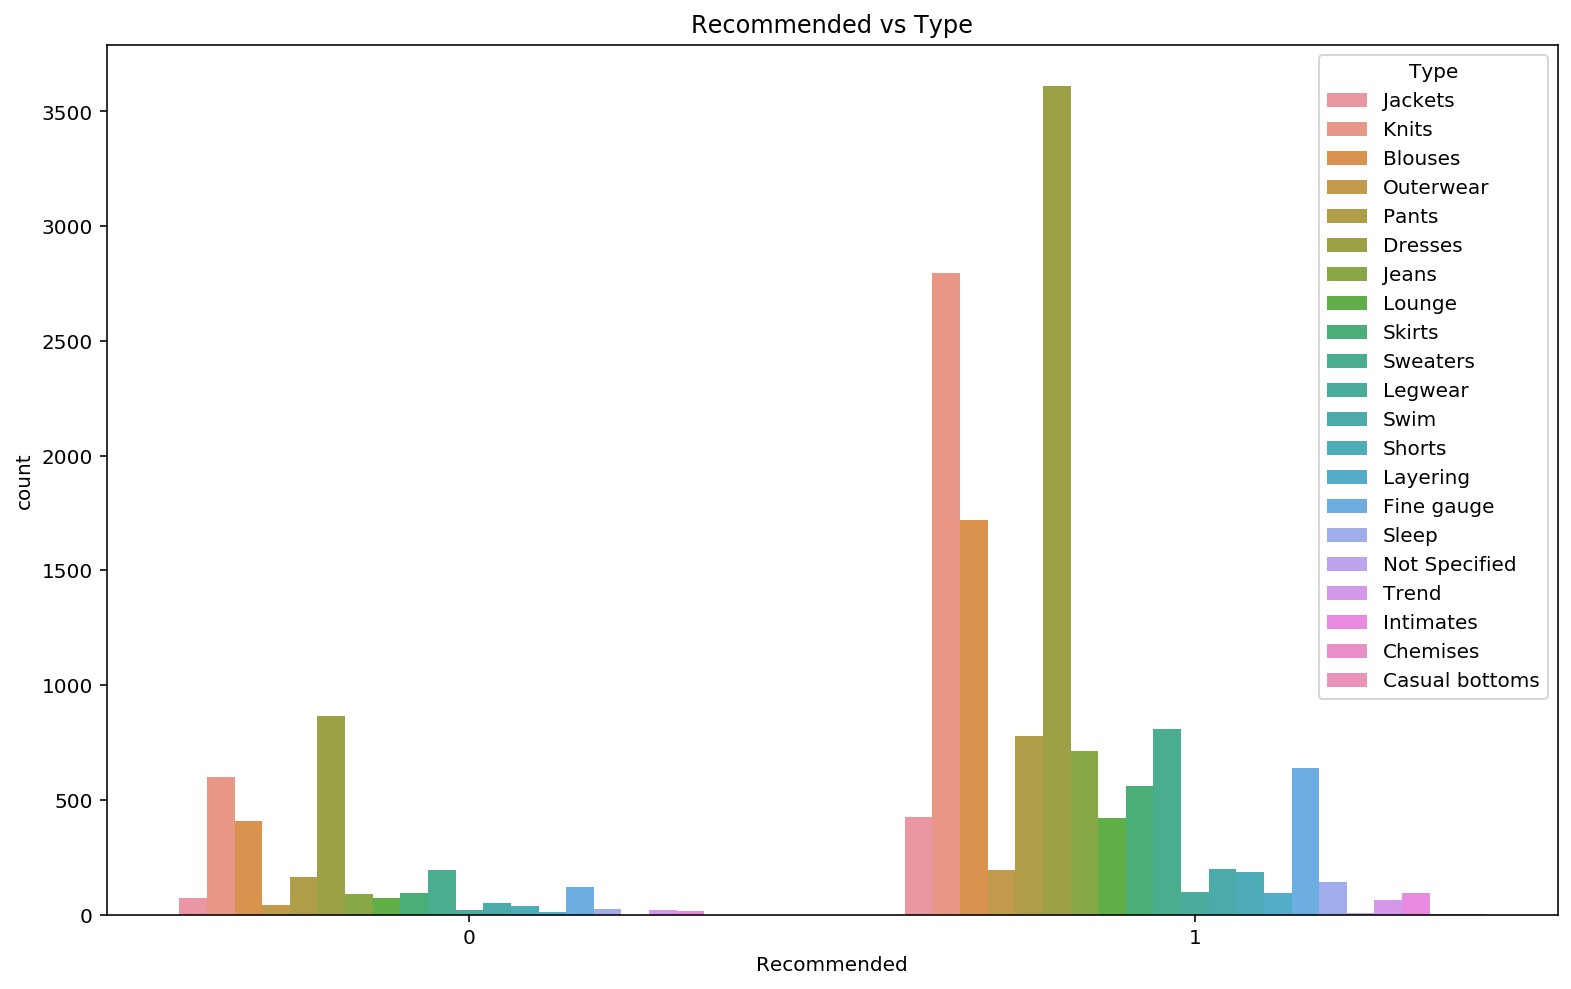

In [31]:
plt.figure(figsize=(13,8))
sns.countplot('Recommended',hue='Type',data=train).set_title('Recommended vs Type')

Text(0.5, 1.0, 'Recommendation for different Divisions')

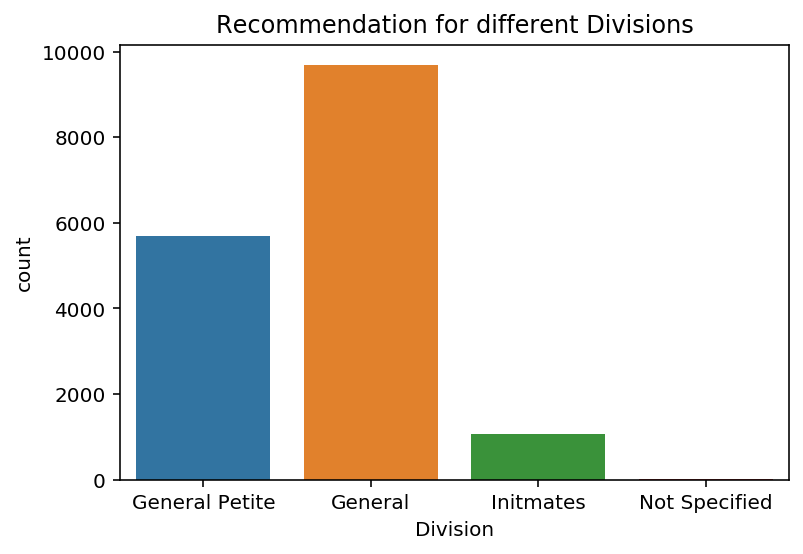

In [32]:
sns.countplot('Division',data=train).set_title('Recommendation for different Divisions')

Text(0.5, 1.0, 'Recommendation for different Departments')

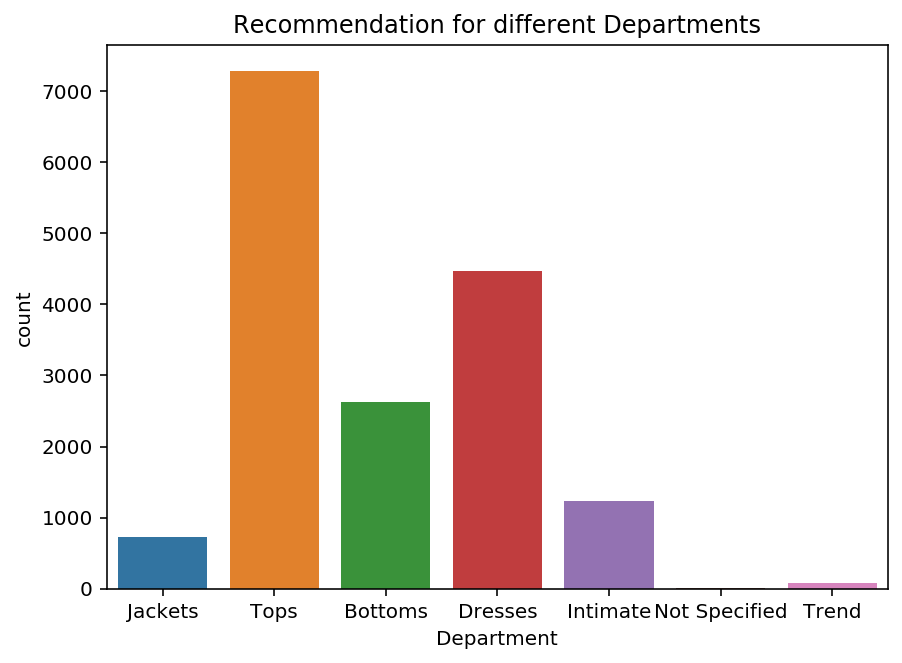

In [33]:
plt.figure(figsize=(7,5))
sns.countplot('Department',data=train).set_title('Recommendation for different Departments')

Text(0.5, 1.0, 'Recommendation for different types of clothing')

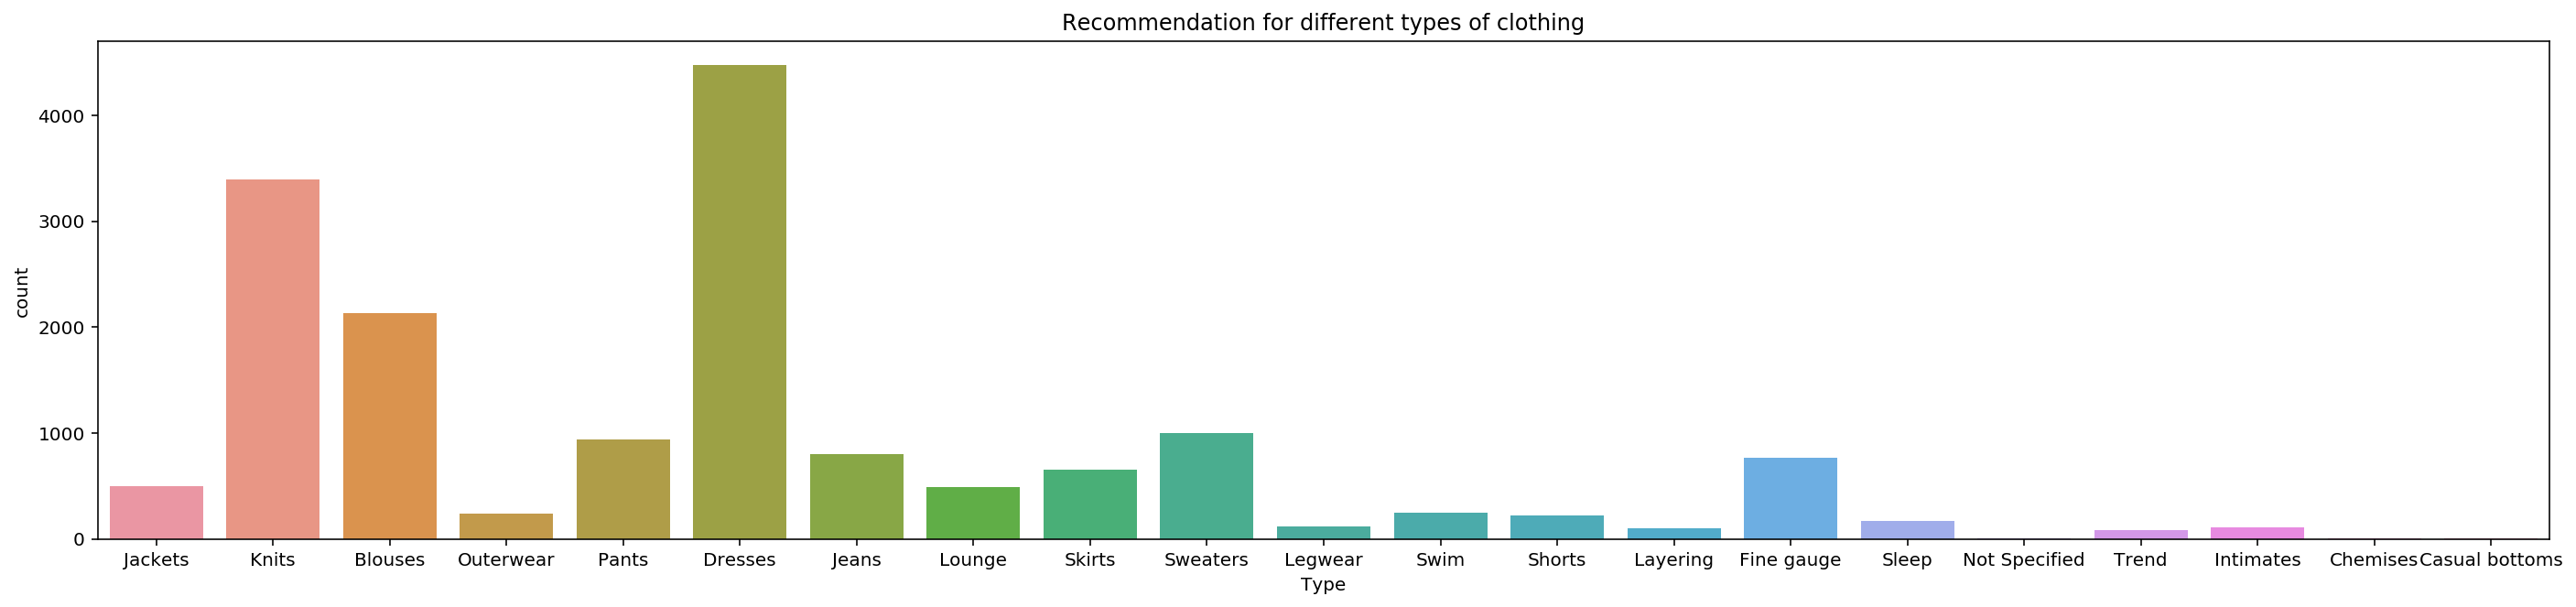

In [34]:
plt.figure(figsize=(24,5))
sns.countplot('Type',data=train).set_title('Recommendation for different types of clothing')

In [35]:
pd.crosstab(index=train["Type"], columns="count")

col_0,count
Type,
Blouses,2129
Casual bottoms,1
Chemises,1
Dresses,4475
Fine gauge,763
Intimates,107
Jackets,496
Jeans,801
Knits,3393


In [36]:
pd.crosstab(index=train["Division"], columns="count")

col_0,count
Division,
General,9677
General Petite,5680
Initmates,1074
Not Specified,9


In [37]:
train.groupby(["Rating", "Recommended"]).size()

Rating  Recommended
1       0               568
        1                11
2       0              1029
        1                65
3       0              1166
        1               802
4       0               115
        1              3442
5       0                15
        1              9227
dtype: int64

In [38]:
train.groupby(["Rating", "Division"]).size()

Rating  Division      
1       General            335
        General Petite     205
        Initmates           39
2       General            668
        General Petite     364
        Initmates           62
3       General           1191
        General Petite     670
        Initmates          107
4       General           2099
        General Petite    1229
        Initmates          229
5       General           5384
        General Petite    3212
        Initmates          637
        Not Specified        9
dtype: int64

In [39]:
train.groupby(["Rating", "Department"]).size()

Rating  Department   
1       Bottoms            70
        Dresses           168
        Intimate           43
        Jackets            37
        Tops              256
        Trend               5
2       Bottoms           141
        Dresses           324
        Intimate           70
        Jackets            40
        Tops              512
        Trend               7
3       Bottoms           293
        Dresses           578
        Intimate          126
        Jackets            55
        Tops              902
        Trend              14
4       Bottoms           558
        Dresses           988
        Intimate          264
        Jackets           147
        Tops             1579
        Trend              21
5       Bottoms          1558
        Dresses          2417
        Intimate          732
        Jackets           453
        Not Specified       9
        Tops             4039
        Trend              34
dtype: int64

In [40]:
train.groupby(["Rating", "Type"]).size()

Rating  Type      
1       Blouses        89
        Dresses       168
        Fine gauge     15
        Intimates       4
        Jackets        25
                     ... 
5       Skirts        385
        Sleep         103
        Sweaters      568
        Swim          139
        Trend          34
Length: 93, dtype: int64

In [41]:
train.groupby(["Recommended", "Division"]).size()

Recommended  Division      
0            General           1729
             General Petite    1002
             Initmates          162
1            General           7948
             General Petite    4678
             Initmates          912
             Not Specified        9
dtype: int64

In [42]:
train.groupby(["Recommended", "Department"]).size()

Recommended  Department   
0            Bottoms           381
             Dresses           865
             Intimate          189
             Jackets           114
             Tops             1325
             Trend              19
1            Bottoms          2239
             Dresses          3610
             Intimate         1046
             Jackets           618
             Not Specified       9
             Tops             5963
             Trend              62
dtype: int64

In [43]:
train.groupby(["Recommended", "Type"]).size()

Recommended  Type          
0            Blouses            409
             Dresses            865
             Fine gauge         122
             Intimates           15
             Jackets             71
             Jeans               90
             Knits              599
             Layering            11
             Legwear             18
             Lounge              72
             Outerwear           43
             Pants              163
             Shorts              36
             Skirts              92
             Sleep               24
             Sweaters           195
             Swim                49
             Trend               19
1            Blouses           1720
             Casual bottoms       1
             Chemises             1
             Dresses           3610
             Fine gauge         641
             Intimates           92
             Jackets            425
             Jeans              711
             Knits             2794


In [44]:
train.groupby(["Positive_Feedback_Count", "Recommended"]).size()

Positive_Feedback_Count  Recommended
0                        0              1198
                         1              6643
1                        0               463
                         1              2335
2                        0               265
                                        ... 
98                       1                 1
99                       1                 1
108                      0                 1
117                      1                 1
122                      1                 1
Length: 122, dtype: int64

Text(0.5, 1.0, 'Positive_Feedback_Count vs Recommended')

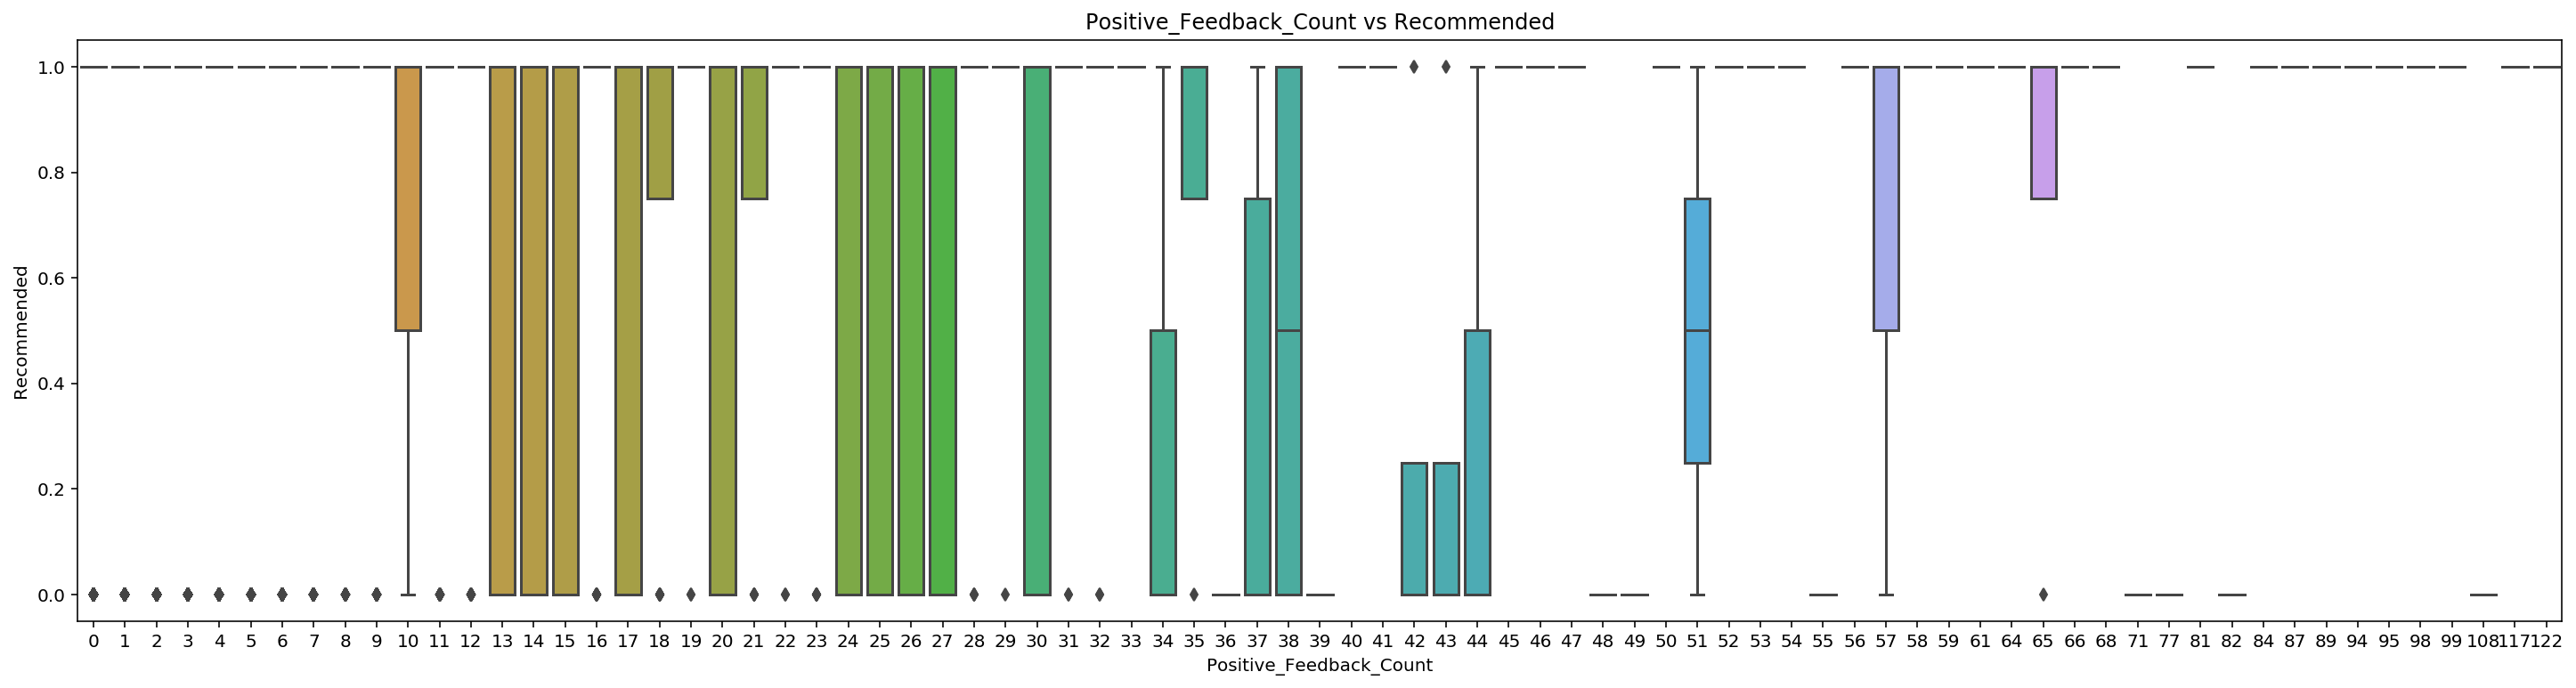

In [45]:
plt.figure(figsize=(25,6))
sns.boxplot(y="Recommended", x="Positive_Feedback_Count", data=train).set_title('Positive_Feedback_Count vs Recommended')

Text(0.5, 1, 'Correlation plot')

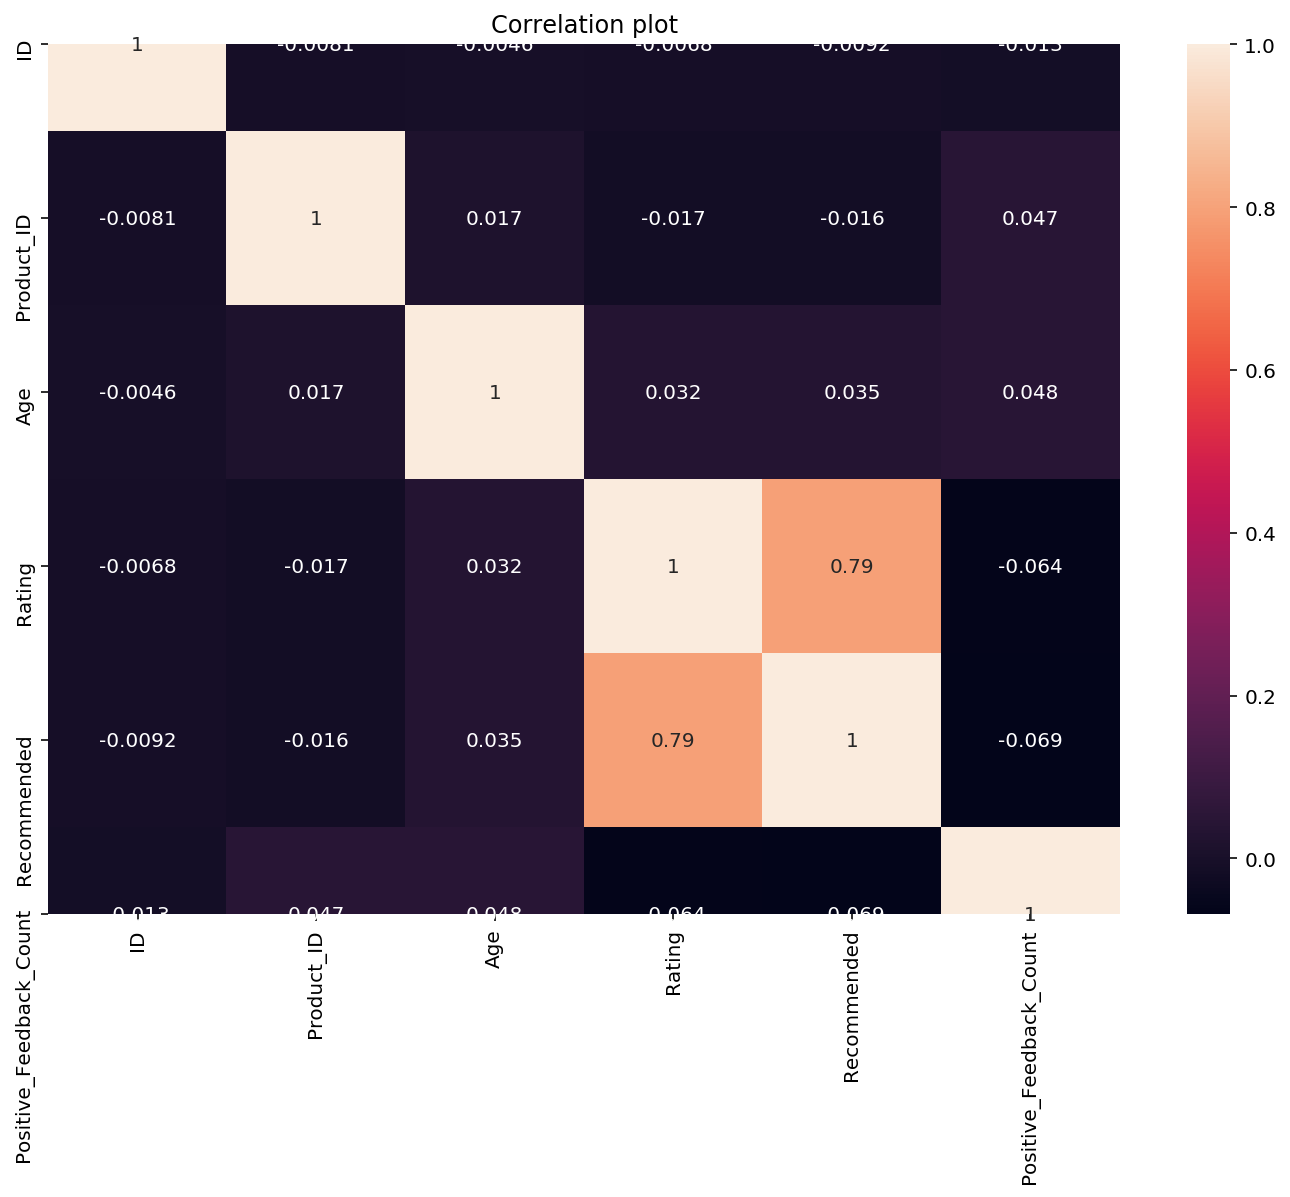

In [46]:
#Heatmap Correlation Figure
plt.figure(figsize=(12,8))
sns.heatmap(train.corr(),annot=True).set_title('Correlation plot')

# Benchmark model

In [47]:
# CountVectorizer = bag of words

In [48]:
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(max_features=500)
train_x = cv.fit_transform(train["Review_Text"].values.astype('U'))
test_x = cv.transform(test["Review_Text"].values.astype('U'))

In [49]:
train_x.shape

(16440, 500)

In [50]:
cv.vocabulary_

{'just': 201,
 'received': 319,
 'and': 23,
 'to': 423,
 'return': 325,
 'am': 20,
 'wear': 463,
 'size': 358,
 'ordered': 281,
 'the': 403,
 'it': 197,
 'way': 462,
 'really': 318,
 'big': 51,
 'wide': 478,
 'this': 414,
 'is': 194,
 'tts': 434,
 'tee': 399,
 'with': 482,
 'of': 270,
 'back': 36,
 'front': 155,
 'neckline': 258,
 'lovely': 238,
 'was': 458,
 'bought': 60,
 'my': 255,
 'normal': 266,
 'small': 370,
 'on': 272,
 'reviews': 330,
 'fit': 145,
 'perfect': 292,
 'color': 78,
 'can': 72,
 'be': 39,
 'worn': 488,
 'year': 495,
 'by': 69,
 'jacket': 199,
 'or': 278,
 'sweater': 393,
 'love': 236,
 'very': 449,
 'happy': 172,
 'shirt': 346,
 'don': 108,
 'like': 220,
 'skin': 362,
 'tight': 420,
 'top': 427,
 'bit': 52,
 'loose': 234,
 'but': 65,
 'does': 106,
 'not': 268,
 'look': 230,
 'wearing': 464,
 'tunic': 435,
 'length': 217,
 'me': 247,
 'so': 373,
 'have': 175,
 'jeans': 200,
 'boots': 57,
 'while': 474,
 'flattering': 149,
 'would': 490,
 'definitely': 96,
 'recommen

In [51]:
#Logistic Regression modeling
from sklearn.linear_model import LogisticRegression

In [52]:
train_y = train["Recommended"]

In [53]:
logreg = LogisticRegression(solver = 'liblinear')

In [54]:
logreg.fit(train_x,train_y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [55]:
predict_y = logreg.predict(test_x)

In [56]:
lr_results = np.array(list(zip(test['ID'],predict_y) ))
lr_results = pd.DataFrame(lr_results,columns = ['ID','Recommended'])
lr_results.to_csv('Group010_Benchmark_Results.csv', index = False)

In [57]:
#checking the performance of benchmark model
from sklearn.model_selection import GridSearchCV

In [58]:
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10]}

In [59]:
grid = GridSearchCV(LogisticRegression(), param_grid, cv=5)

In [60]:
grid.fit(train_x,train_y)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='warn',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='warn',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [61]:
print("Best cross-validation score: {:.3f}".format(grid.best_score_))

Best cross-validation score: 0.885


In [62]:
grid.fit(test_x, predict_y)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='warn',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='warn',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [63]:
print("Best cross-validation score: {:.3f}".format(grid.best_score_))

Best cross-validation score: 0.965


In [64]:
vocab = cv.get_feature_names()
vocab

['10',
 '12',
 '26',
 'able',
 'about',
 'above',
 'absolutely',
 'across',
 'actually',
 'add',
 'adorable',
 'after',
 'again',
 'agree',
 'all',
 'almost',
 'already',
 'also',
 'although',
 'always',
 'am',
 'amazing',
 'an',
 'and',
 'another',
 'any',
 'anything',
 'are',
 'area',
 'arm',
 'arms',
 'around',
 'arrived',
 'as',
 'at',
 'away',
 'back',
 'bad',
 'baggy',
 'be',
 'beautiful',
 'beautifully',
 'because',
 'been',
 'before',
 'being',
 'below',
 'belt',
 'best',
 'better',
 'between',
 'big',
 'bit',
 'black',
 'blouse',
 'blue',
 'body',
 'boots',
 'both',
 'bottom',
 'bought',
 'boxy',
 'bra',
 'brand',
 'bust',
 'but',
 'button',
 'buttons',
 'buy',
 'by',
 'came',
 'cami',
 'can',
 'cardigan',
 'casual',
 'cheap',
 'chest',
 'coat',
 'color',
 'colors',
 'come',
 'comfortable',
 'comfy',
 'compliments',
 'cool',
 'cotton',
 'could',
 'couldn',
 'cozy',
 'curvy',
 'cut',
 'cute',
 'dark',
 'day',
 'days',
 'decided',
 'definitely',
 'denim',
 'design',
 'detail',
 

In [65]:
coefficient = grid.best_estimator_.coef_[0]
coefficient.shape

(500,)

In [66]:
top50 = np.argsort(coefficient)[-50:][::-1]
top50

array([ 21, 375, 293,  81,  41, 264, 443, 292, 172, 395, 367,  83, 139,
         2, 225,  82, 310, 336, 435, 280, 236, 112, 177, 168, 453, 372,
       146, 117, 320,  74, 339, 263, 160,  52, 302, 333,  19, 200, 287,
       456, 434, 180, 394, 450, 252, 426,  55, 206, 219, 448])

In [67]:
Best_Estimator = []
for i in top50:
    Best_Estimator.append(vocab[i]) 
print(Best_Estimator)

['amazing', 'sold', 'perfectly', 'comfortable', 'beautifully', 'nicely', 'unique', 'perfect', 'happy', 'tad', 'slightly', 'compliments', 'feminine', '26', 'little', 'comfy', 'purchase', 'said', 'tunic', 'order', 'love', 'dressed', 'heels', 'great', 'wait', 'snug', 'fits', 'easy', 'recommend', 'casual', 'saw', 'nice', 'glad', 'bit', 'pink', 'run', 'always', 'jeans', 'overall', 'wardrobe', 'tts', 'highly', 'swing', 'vest', 'most', 'took', 'blue', 'knit', 'lightweight', 'versatile']


# Improving Benchmark Model

# Improvement Model 1 - by using TF_IDF

In [68]:
from sklearn.feature_extraction.text import TfidfVectorizer 
tfidfconverter1 = TfidfVectorizer(max_features=500)  
train_x_new1 = tfidfconverter1.fit_transform(train["Review_Text"].values.astype('U'))
test_x_new1 = tfidfconverter1.transform(test["Review_Text"].values.astype('U'))

In [69]:
train_x_new1.shape

(16440, 500)

In [70]:
tfidfconverter1.vocabulary_

{'just': 201,
 'received': 319,
 'and': 23,
 'to': 423,
 'return': 325,
 'am': 20,
 'wear': 463,
 'size': 358,
 'ordered': 281,
 'the': 403,
 'it': 197,
 'way': 462,
 'really': 318,
 'big': 51,
 'wide': 478,
 'this': 414,
 'is': 194,
 'tts': 434,
 'tee': 399,
 'with': 482,
 'of': 270,
 'back': 36,
 'front': 155,
 'neckline': 258,
 'lovely': 238,
 'was': 458,
 'bought': 60,
 'my': 255,
 'normal': 266,
 'small': 370,
 'on': 272,
 'reviews': 330,
 'fit': 145,
 'perfect': 292,
 'color': 78,
 'can': 72,
 'be': 39,
 'worn': 488,
 'year': 495,
 'by': 69,
 'jacket': 199,
 'or': 278,
 'sweater': 393,
 'love': 236,
 'very': 449,
 'happy': 172,
 'shirt': 346,
 'don': 108,
 'like': 220,
 'skin': 362,
 'tight': 420,
 'top': 427,
 'bit': 52,
 'loose': 234,
 'but': 65,
 'does': 106,
 'not': 268,
 'look': 230,
 'wearing': 464,
 'tunic': 435,
 'length': 217,
 'me': 247,
 'so': 373,
 'have': 175,
 'jeans': 200,
 'boots': 57,
 'while': 474,
 'flattering': 149,
 'would': 490,
 'definitely': 96,
 'recommen

In [71]:
from sklearn.linear_model import LogisticRegression

In [72]:
logreg = LogisticRegression(solver = 'liblinear')

In [73]:
logreg.fit(train_x_new1,train_y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [74]:
predict_y_new1 = logreg.predict(test_x_new1)

In [75]:
#checking the performance of improvement model 1
from sklearn.model_selection import GridSearchCV

In [76]:
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10]}

In [77]:
grid = GridSearchCV(LogisticRegression(), param_grid, cv=5)

In [78]:
grid.fit(train_x_new1,train_y)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='warn',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='warn',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [79]:
print("Best cross-validation score: {:.3f}".format(grid.best_score_))

Best cross-validation score: 0.886


In [80]:
grid.fit(test_x_new1, predict_y_new1)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='warn',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='warn',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [81]:
print("Best cross-validation score: {:.3f}".format(grid.best_score_))

Best cross-validation score: 0.967


In [82]:
#checking best estimator words to compare with the benchmark model
vocab1 = np.array(tfidfconverter1.get_feature_names())
tfidf_sorting = np.argsort(train_x_new1.toarray()).flatten()[::-1]

In [83]:
top50_1 = tfidf_sorting[:50]
print(top50_1)

[403 191 123 402 137 415 429 128  89 195  23 111 193 130 358 202  25 181
 264 268 323  43 416 271 106  90 347 295 381 228  17  14 285  22 479 194
 490 425  27 175 236 255 373 482 270 151 272  65 423 414]


In [84]:
Best_Estimator1 = []
for i in top50_1:
    Best_Estimator1.append(vocab1[i]) 
print(Best_Estimator1)

['the', 'in', 'even', 'that', 'fell', 'those', 'torso', 'excited', 'curvy', 'isn', 'and', 'dress', 'into', 'extra', 'size', 'keep', 'any', 'hips', 'nicely', 'not', 'regular', 'been', 'though', 'off', 'does', 'cut', 'short', 'petite', 'store', 'long', 'also', 'all', 'out', 'an', 'will', 'is', 'would', 'too', 'are', 'have', 'love', 'my', 'so', 'with', 'of', 'for', 'on', 'but', 'to', 'this']


# Improvement model 2 - by adding highly correlated variables

In [85]:
from scipy.sparse import hstack
from scipy import sparse

In [86]:
train_x_add = sparse.csr_matrix(train[['Rating','Age']].values)
test_x_add = sparse.csr_matrix(test[['Rating','Age']].values)

In [87]:
train_x_new2 = hstack([train_x, train_x_add])
test_x_new2 = hstack([test_x, test_x_add])

In [88]:
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10]}
grid = GridSearchCV(LogisticRegression(), param_grid, cv=5)

In [89]:
grid.fit(train_x_new2,train_y)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='warn',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='warn',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [90]:
print("Best cross-validation score: {:.3f}".format(grid.best_score_))

Best cross-validation score: 0.940


In [91]:
predict_y_new2 = grid.best_estimator_.predict(test_x_new2)

In [92]:
grid.fit(test_x_new2,predict_y_new2)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='warn',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='warn',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [93]:
print("Best cross-validation score: {:.3f}".format(grid.best_score_))

Best cross-validation score: 0.968


# Improvement model 3 - by adding stop words

In [94]:
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS as esw
StopWords = list(esw) 

In [95]:
cv2 = CountVectorizer(max_features=500,stop_words=StopWords)  
train_x3 = cv2.fit_transform(train["Review_Text"].values.astype('U'))
test_x3 = cv2.transform(test["Review_Text"].values.astype('U'))

In [96]:
train_x_new3 = hstack([train_x3, train_x_add])
test_x_new3 = hstack([test_x3, test_x_add])

In [97]:
cv2.vocabulary_

{'just': 211,
 'received': 330,
 'return': 336,
 'wear': 471,
 'size': 372,
 'ordered': 286,
 'way': 470,
 'really': 328,
 'big': 37,
 'wide': 479,
 'tts': 441,
 'basic': 31,
 'tee': 415,
 'flare': 151,
 'neckline': 270,
 'lovely': 253,
 'bought': 46,
 'normal': 278,
 'small': 386,
 'based': 30,
 'reviews': 342,
 'fit': 147,
 'perfect': 297,
 'color': 74,
 'classic': 66,
 'neutral': 273,
 'worn': 489,
 'year': 496,
 'jacket': 207,
 'sweater': 409,
 'love': 251,
 'happy': 176,
 'shirt': 360,
 'don': 111,
 'like': 233,
 'skin': 376,
 'tight': 426,
 'clothes': 69,
 'bit': 39,
 'loose': 248,
 'does': 109,
 'look': 244,
 'wearing': 472,
 'tunic': 442,
 'length': 230,
 'jeans': 209,
 'boots': 45,
 'flattering': 154,
 'definitely': 99,
 'recommend': 331,
 'cut': 92,
 'fall': 135,
 'got': 168,
 'compliments': 82,
 'time': 428,
 'wore': 485,
 'fabric': 133,
 'lace': 221,
 'said': 350,
 'arm': 20,
 'area': 19,
 'makes': 258,
 'sadly': 349,
 'going': 165,
 'skinny': 377,
 'upper': 449,
 'arms': 2

In [98]:
grid.fit(train_x_new3,train_y)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='warn',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='warn',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [99]:
print("Best cross-validation score: {:.3f}".format(grid.best_score_))

Best cross-validation score: 0.939


In [100]:
predict_y_new3 = grid.best_estimator_.predict(test_x_new3)

In [101]:
grid.fit(test_x_new3,predict_y_new3)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='warn',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='warn',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [102]:
print("Best cross-validation score: {:.3f}".format(grid.best_score_))

Best cross-validation score: 0.973


In [103]:
#cross-validating the results from different models
from sklearn.model_selection import cross_val_score

In [104]:
train_benchmark_model=cross_val_score(GridSearchCV(LogisticRegression(), param_grid, cv=5),train_x,train_y)
print(train_benchmark_model)

[0.87940157 0.88339416 0.8775324 ]


In [105]:
round(train_benchmark_model.mean(),3)

0.88

In [106]:
test_benchmark_model=cross_val_score(GridSearchCV(LogisticRegression(), param_grid, cv=5),test_x,predict_y)
print(test_benchmark_model)

[0.96606435 0.96603441 0.95941773]


In [107]:
round(test_benchmark_model.mean(),3)

0.964

In [108]:
train_improv_model1=cross_val_score(GridSearchCV(LogisticRegression(), param_grid, cv=5),train_x_new1,train_y)
print(train_improv_model1)

[0.88323299 0.88886861 0.88081767]


In [109]:
round(train_improv_model1.mean(),3)

0.884

In [110]:
test_improv_model1=cross_val_score(GridSearchCV(LogisticRegression(), param_grid, cv=5),test_x_new1,predict_y_new1)
print(test_improv_model1)

[0.96825397 0.96560847 0.96118218]


In [111]:
round(test_improv_model1.mean(),3)

0.965

In [112]:
train_improv_model2=cross_val_score(GridSearchCV(LogisticRegression(), param_grid, cv=5),train_x_new2,train_y)
print(train_improv_model2)

[0.93650794 0.93832117 0.93721482]


In [113]:
round(train_improv_model2.mean(),3)

0.937

In [114]:
test_improv_model2=cross_val_score(GridSearchCV(LogisticRegression(), param_grid, cv=5),test_x_new2,predict_y_new2)
print(test_improv_model2)

[0.9691358  0.96560847 0.96426996]


In [115]:
round(test_improv_model2.mean(),3)

0.966

In [116]:
train_improv_model3=cross_val_score(GridSearchCV(LogisticRegression(), param_grid, cv=5),train_x_new3,train_y)
print(train_improv_model3)

[0.93924466 0.93850365 0.93374703]


In [117]:
round(train_improv_model3.mean(),3)

0.937

In [118]:
test_improv_model3=cross_val_score(GridSearchCV(LogisticRegression(), param_grid, cv=5),test_x_new3,predict_y_new3)
print(test_improv_model3)

[0.97222222 0.96869489 0.97397442]


In [119]:
round(test_improv_model3.mean(),3)

0.972

# Interpreting Model

In [120]:
# top 500 estimator words 

In [121]:
vocab2 = cv2.get_feature_names()

In [122]:
Additional = ['Rating', 'Age']

In [123]:
TopList = vocab2 + Additional
TopList

['10',
 '115',
 '12',
 '120',
 '26',
 '27',
 '28',
 '30',
 'able',
 'absolutely',
 'actually',
 'add',
 'addition',
 'adds',
 'adorable',
 'agree',
 'amazing',
 'ankle',
 'appears',
 'area',
 'arm',
 'armholes',
 'arms',
 'arrived',
 'athletic',
 'available',
 'away',
 'awesome',
 'bad',
 'baggy',
 'based',
 'basic',
 'beautiful',
 'beautifully',
 'belt',
 'best',
 'better',
 'big',
 'bigger',
 'bit',
 'black',
 'blouse',
 'blue',
 'body',
 'booties',
 'boots',
 'bought',
 'boxy',
 'bra',
 'brand',
 'bright',
 'broad',
 'brown',
 'bulky',
 'bust',
 'busty',
 'button',
 'buttons',
 'buy',
 'buying',
 'came',
 'cami',
 'cardigan',
 'casual',
 'cheap',
 'chest',
 'classic',
 'close',
 'closet',
 'clothes',
 'clothing',
 'coat',
 'cold',
 'collar',
 'color',
 'colored',
 'colors',
 'come',
 'comes',
 'comfortable',
 'comfy',
 'completely',
 'compliments',
 'cool',
 'cotton',
 'couldn',
 'cover',
 'cozy',
 'cream',
 'cropped',
 'curves',
 'curvy',
 'cut',
 'cute',
 'dark',
 'day',
 'days',


In [124]:
coefficient = grid.best_estimator_.coef_[0]

In [125]:
coefficient.shape

(502,)

In [126]:
top50 = np.argsort(coefficient)[-50:][::-1]
top50

array([500, 382, 262, 285, 104, 309, 122, 219, 375,  34, 150, 107,  16,
       296, 448, 143,  79, 347, 101, 400, 159, 308, 206, 380, 223, 421,
         2, 115, 354, 364, 331, 137, 249,  27, 390, 265, 407, 481, 289,
        63, 460, 405, 220,  52, 171,  80, 205, 413,   1, 322])

In [127]:
Best_Estimator = []
for i in top50:
    Best_Estimator.append(TopList[i]) 
print(Best_Estimator)

['Rating', 'slightly', 'medium', 'order', 'details', 'plan', 'elegant', 'knit', 'sizing', 'belt', 'fitting', 'different', 'amazing', 'people', 'unique', 'feminine', 'comfortable', 'run', 'denim', 'stunning', 'fun', 'pink', 'ivory', 'sleeve', 'larger', 'think', '12', 'dressed', 'say', 'shorts', 'recommend', 'far', 'lot', 'awesome', 'sold', 'mind', 'sure', 'wish', 'overall', 'casual', 'waisted', 'summer', 'know', 'brown', 'great', 'comfy', 'item', 'tall', '115', 'purchase']


In [128]:
pip install mglearn

Note: you may need to restart the kernel to use updated packages.


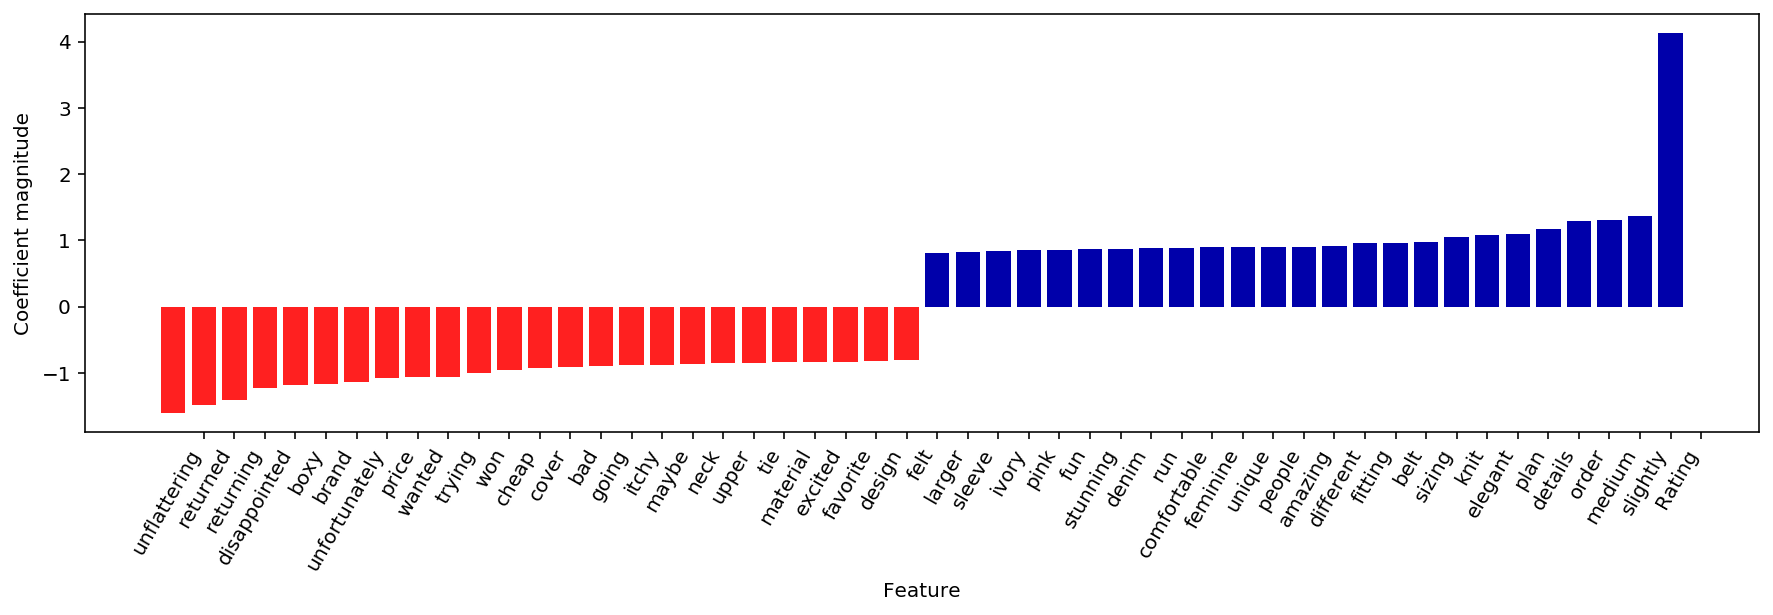

In [129]:
import matplotlib.pyplot as plt
import mglearn
mglearn.tools.visualize_coefficients(grid.best_estimator_.coef_, TopList, n_top_features=25)
plt.show()

# Final Test Results

In [130]:
predict_y_new3 = grid.best_estimator_.predict(test_x_new3)

In [131]:
lr_results = np.array(list(zip(test['ID'],predict_y_new3) ))
lr_results = pd.DataFrame(lr_results,columns = ['ID','Recommended'])
lr_results.to_csv('Group010_Test_Results.csv', index = False)